In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
books=[]
books=pd.read_csv("C:\\Users\\User-PC\\Desktop\\Data Science\\Data Science Assignment\\18 Association Rules\\book.csv",sep=",")
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [3]:
frequent_items = apriori(books, min_support = 0.005,max_len = 3, use_colnames = True)

In [4]:
## Most frequent items set based on support  
frequent_items.sort_values('support',ascending= False, inplace = True)

In [5]:
##Building the rules
rules = association_rules(frequent_items,metric="lift",min_threshold = 1)

In [6]:
##The above code gives us the rules with threshold greater than 1
rules.sort_values('lift', ascending = False, inplace = True)

In [7]:
## Initiating Redundancy rules

In [8]:
## To eliminate the reducdancy in rules
def to_list(i):
    return sorted(i)

In [9]:
ma_x = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)
ma_x = ma_x.apply(sorted)

In [10]:
return_rules = list(ma_x)
unique_rules = [list(m) for m in set(tuple(i) for i in return_rules)]

In [11]:
index_rules = []
for i in unique_rules:
    index_rules.append(return_rules.index(i))

In [12]:
index_rules

[286,
 998,
 118,
 976,
 598,
 104,
 20,
 254,
 10,
 508,
 74,
 154,
 853,
 866,
 222,
 478,
 102,
 306,
 368,
 216,
 824,
 274,
 506,
 1048,
 44,
 152,
 230,
 284,
 444,
 0,
 196,
 476,
 574,
 1012,
 110,
 112,
 98,
 292,
 234,
 640,
 398,
 246,
 66,
 22,
 260,
 404,
 566,
 888,
 302,
 982,
 418,
 4,
 252,
 170,
 238,
 370,
 374,
 610,
 26,
 906,
 78,
 396,
 470,
 54,
 129,
 1024,
 308,
 354,
 844,
 450,
 910,
 948,
 994,
 440,
 190,
 310,
 58,
 728,
 122,
 200,
 736,
 116,
 757,
 600,
 992,
 1014,
 146,
 186,
 366,
 446,
 586,
 282,
 1052,
 106,
 108,
 184,
 761,
 912,
 272,
 590,
 900,
 714,
 350,
 180,
 124,
 266,
 6,
 986,
 182,
 616,
 88,
 192,
 278,
 324,
 378,
 248,
 932,
 642,
 36,
 224,
 666,
 280,
 400,
 150,
 8,
 256,
 924,
 946,
 490,
 707,
 658,
 250,
 290,
 564,
 973,
 806,
 48,
 244,
 938,
 987,
 276,
 486,
 114,
 484,
 198,
 208,
 744,
 944,
 30,
 294,
 748,
 904,
 236,
 386,
 258,
 2,
 270,
 318,
 978,
 188,
 392,
 792,
 1020,
 220,
 262,
 402,
 52,
 550,
 954,
 942,


In [13]:
##Getting the rules without any reducdancies
rules_without_reducdancies = rules.iloc[index_rules, : ]

In [14]:
##Sorting them with respect to lift 
rules_without_reducdancies.sort_values('lift', ascending = False, inplace = True)

<ipython-input-14-549961277886>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_without_reducdancies.sort_values('lift', ascending = False, inplace = True)


In [15]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
750,"(ItalArt, RefBks)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
751,(ItalAtlas),"(ItalArt, RefBks)",0.0370,0.0200,0.0165,0.445946,22.297297,0.015760,1.768780
743,"(ItalAtlas, ArtBks)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
746,(ItalArt),"(ItalAtlas, ArtBks)",0.0485,0.0180,0.0165,0.340206,18.900344,0.015627,1.488344
353,(ItalArt),"(ItalCook, ArtBks)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
352,"(ItalCook, ArtBks)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
562,"(ItalCook, RefBks)",(ItalAtlas),0.0465,0.0370,0.0230,0.494624,13.368207,0.021279,1.905511
563,(ItalAtlas),"(ItalCook, RefBks)",0.0370,0.0465,0.0230,0.621622,13.368207,0.021279,2.519964
925,(ItalArt),"(ItalAtlas, GeogBks)",0.0485,0.0205,0.0115,0.237113,11.566507,0.010506,1.283939
920,"(ItalAtlas, GeogBks)",(ItalArt),0.0205,0.0485,0.0115,0.560976,11.566507,0.010506,2.167306


In [16]:
## 3D plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
support = rules_without_reducdancies["support"]
confidence = rules_without_reducdancies["confidence"]
lift = rules_without_reducdancies["lift"]

Text(0.5, 0, 'lift')

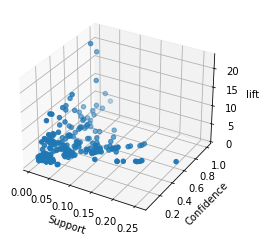

In [18]:
fig = plt.figure()
ax= fig.add_subplot(111, projection = '3d')
ax.scatter(support,confidence,lift)
ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("lift")

Text(0, 0.5, 'confidence')

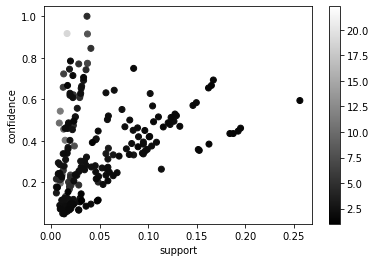

In [19]:
## Scatter plot
import scipy as sp
plt.scatter(x=support, y=confidence, c=lift , cmap = 'gray')
plt.colorbar()
plt.xlabel("support")
plt.ylabel("confidence")

Total number of rules are 212, with minimum support = 0.005 and maximum length = 4 , which are without any reducdancies

In [20]:
## Changing min support value to 0.007

frequent_items1 = apriori(books,min_support = 0.007,max_len = 4 , use_colnames = True)

In [21]:
#Most frequent items based on the support, decending order
frequent_items1.sort_values('support', ascending = False, inplace = True)

In [22]:
##Building rules
rules2 = association_rules(frequent_items1 , metric = 'lift' , min_threshold = 1)

##Rules2 are the rules which are generated with the minimum threshold as 1
rules2.sort_values('lift',ascending = False , inplace = True)

In [23]:
## Eliminate redundancies

def to_list1(i):
    return(sorted(i))

ma_x1 = rules2.antecedents.apply(to_list1)+ rules2.consequents.apply(to_list1)

ma_x1 = ma_x1.apply(sorted)

return_rules1 = list(ma_x1)
unique_rules1 = [list(m) for m in set(tuple(i) for i  in return_rules1 )]

In [24]:
index_rules1 = []
for i in unique_rules1:
    index_rules1.append(return_rules1.index(i))

In [25]:
### eliminate rules with reducdancies 
rules_without_reduc = rules2.iloc[index_rules1,:]

In [26]:
##Sorting the rules
rules_without_reduc.sort_values('lift', ascending = False, inplace = True)

<ipython-input-26-15b0b4116ade>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_without_reduc.sort_values('lift', ascending = False, inplace = True)


In [28]:
rules_without_reduc

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2160,"(ItalArt, RefBks)","(ItalAtlas, ArtBks)",0.0200,0.0180,0.0165,0.825000,45.833333,0.016140,5.611429
3317,"(ItalArt, RefBks)","(ItalAtlas, GeogBks)",0.0200,0.0205,0.0115,0.575000,28.048780,0.011090,2.304706
3118,"(ItalAtlas, ItalCook)","(ItalArt, RefBks)",0.0230,0.0200,0.0125,0.543478,27.173913,0.012040,2.146667
2632,"(ItalAtlas, ChildBks)","(ItalArt, RefBks)",0.0285,0.0200,0.0145,0.508772,25.438596,0.013930,1.995000
3848,"(ItalAtlas, DoItYBks)","(ItalArt, RefBks)",0.0190,0.0200,0.0095,0.500000,25.000000,0.009120,1.960000
...,...,...,...,...,...,...,...,...,...
0,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
1040,(Florence),(RefBks),0.1085,0.2145,0.0310,0.285714,1.332001,0.007727,1.099700
654,(Florence),(ChildBks),0.1085,0.4230,0.0485,0.447005,1.056748,0.002605,1.043408
1012,(DoItYBks),(Florence),0.2820,0.1085,0.0315,0.111702,1.029513,0.000903,1.003605


there are 459 rules

In [29]:
## 3D plots
support2 = rules_without_reduc["support"]
confidence2 =  rules_without_reduc["confidence"]
lift2 = rules_without_reduc["lift"]

Text(0.5, 0, 'lift')

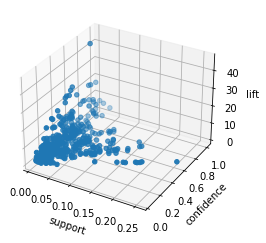

In [30]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support2,confidence2,lift2)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

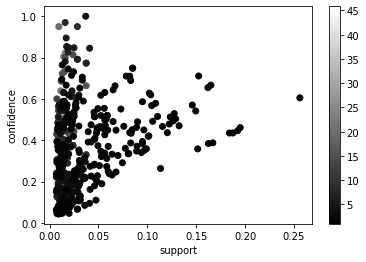

In [31]:
## Scatter plot
plt.scatter(support2,confidence2, c =lift2, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")

In [32]:
## changing min support to 0.1, max length to 3

frequent_items2 = apriori(books, min_support = 0.1 , max_len = 3,use_colnames = True)

## Sorting the rules is decending order
frequent_items2.sort_values('support', ascending = False, inplace = True)

In [34]:
## Building the rules 
rules3 = association_rules(frequent_items2, metric = 'lift', min_threshold = 1 )

rules3.sort_values('lift', ascending = False, inplace = True )
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
63,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
62,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
88,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
89,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
97,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
8,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
16,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
17,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069


In [35]:
### To remove the reducdancies
def to_list3(i):
    return(sorted(i))
    
max_x2 = rules3.antecedents.apply(to_list3)+rules3.consequents.apply(to_list3)

max_x2 = max_x2.apply(sorted)


In [36]:
## Finding unique rules

return_rules3 = list(max_x2)
unique_rules3 = [list(m) for m in set(tuple(i) for i in return_rules3)]

index_rules3=[]
for i in unique_rules3:
    index_rules3.append(return_rules3.index(i))

In [37]:
index_rules3

[96,
 86,
 98,
 84,
 88,
 0,
 22,
 80,
 72,
 26,
 58,
 6,
 10,
 94,
 78,
 20,
 48,
 92,
 24,
 82,
 74,
 18,
 16,
 90,
 30,
 76,
 70,
 4,
 2,
 68]

In [38]:
## removing reducdancies
rules_without_reduc1 = rules3.iloc[index_rules3,:] 

In [41]:
## Sorting these rules
rules_without_reduc1.sort_values('lift', ascending = False, inplace = True)
rules_without_reduc1

<ipython-input-41-d2e75e4e2f11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_without_reduc1.sort_values('lift', ascending = False, inplace = True)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
63,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
88,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
97,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
83,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
54,"(ChildBks, CookBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277
25,(GeogBks),"(ChildBks, CookBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273
69,(GeogBks),"(DoItYBks, CookBks)",0.2760,0.1875,0.1085,0.393116,2.096618,0.056750,1.338806
76,"(DoItYBks, ChildBks)",(GeogBks),0.1840,0.2760,0.1045,0.567935,2.057735,0.053716,1.675673
45,"(ChildBks, CookBks)",(ArtBks),0.2560,0.2410,0.1265,0.494141,2.050376,0.064804,1.500417
39,(YouthBks),"(ChildBks, CookBks)",0.2475,0.2560,0.1290,0.521212,2.035985,0.065640,1.553924


There are 30 unique rules

In [42]:
# 3D plots
support3 = rules_without_reduc1["support"]
confidence3 = rules_without_reduc1["confidence"]
lift3 = rules_without_reduc1["lift"]

Text(0.5, 0, 'lift')

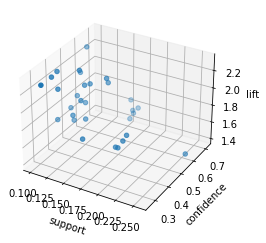

In [43]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection = '3d')
ax3.scatter(support3,confidence3,lift3)
ax3.set_xlabel("support")
ax3.set_ylabel("confidence")
ax3.set_zlabel("lift")

Text(0, 0.5, 'Confidence')

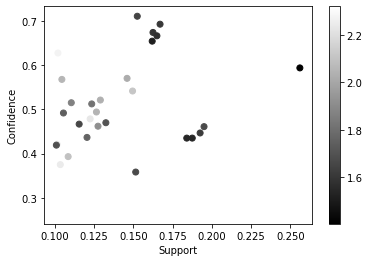

In [44]:
## Scatter plot
plt.scatter(support3, confidence3, c=lift3 , cmap='gray')
plt.colorbar()
plt.xlabel("Support");plt.ylabel("Confidence")